In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
all_data = pd.read_pickle('./data/no_singletons_data.pkl')

print(all_data)
# all_data = all_data.drop_duplicates(subset=['Team', 'Opponent'])
# all_data = all_data.groupby(['Team', 'Opponent'], as_index=False).mean()
# Group by 'Date', 'Team', and 'Opponent' 


all_data

                     Date    Type Opponent    Tm    Opp  \
0     2023-11-06 00:00:00     REG    UConn  52.0   95.0   
1     2023-11-11 00:00:00     REG    UConn  67.0  107.0   
2     2023-11-14 00:00:00     REG    UConn  53.0   87.0   
3     2023-11-19 00:00:00     REG    UConn  57.0   77.0   
4     2023-11-20 00:00:00     REG    UConn  71.0   81.0   
...                   ...     ...      ...   ...    ...   
2371  2024-03-02 00:00:00     REG   Wagner  57.0   54.0   
2372  2024-03-06 00:00:00  CTOURN   Wagner  57.0   60.0   
2373  2024-03-09 00:00:00  CTOURN   Wagner  56.0   66.0   
2374  2024-03-12 00:00:00  CTOURN   Wagner  47.0   54.0   
2376  2024-03-21 00:00:00    NCAA   Wagner  90.0   62.0   

                           Team  Diff  
0              Northern Arizona -43.0  
1                     Stonehill -40.0  
2      Mississippi Valley State -34.0  
3                       Indiana -20.0  
4                         Texas -10.0  
...                         ...   ...  
2371       

,Date,Type,Opponent,Tm,Opp,Team,Diff
0,2023-11-06 00:00:00,REG,UConn,52.0,95.0,Northern Arizona,-43.0
1,2023-11-11 00:00:00,REG,UConn,67.0,107.0,Stonehill,-40.0
2,2023-11-14 00:00:00,REG,UConn,53.0,87.0,Mississippi Valley State,-34.0
3,2023-11-19 00:00:00,REG,UConn,57.0,77.0,Indiana,-20.0
4,2023-11-20 00:00:00,REG,UConn,71.0,81.0,Texas,-10.0
...,...,...,...,...,...,...,...
2371,2024-03-02 00:00:00,REG,Wagner,57.0,54.0,FDU,3.0
2372,2024-03-06 00:00:00,CTOURN,Wagner,57.0,60.0,Sacred Heart,-3.0
2373,2024-03-09 00:00:00,CTOURN,Wagner,56.0,66.0,Central Connecticut State,-10.0
2374,2024-03-12 00:00:00,CTOURN,Wagner,47.0,54.0,Merrimack,-7.0


[('Northern Arizona', 'UConn', {'weight': 95.0, 'id': 0}), ('Northern Arizona', 'Grand Canyon', {'weight': 89.0, 'id': 1612}), ('Northern Arizona', 'Montana State', {'weight': 71.0, 'id': 2262}), ('UConn', 'Northern Arizona', {'weight': 52.0, 'id': 0}), ('UConn', 'Stonehill', {'weight': 67.0, 'id': 1}), ('UConn', 'Mississippi Valley State', {'weight': 53.0, 'id': 2}), ('UConn', 'Indiana', {'weight': 57.0, 'id': 3}), ('UConn', 'Texas', {'weight': 71.0, 'id': 4}), ('UConn', 'Manhattan', {'weight': 60.0, 'id': 5}), ('UConn', 'New Hampshire', {'weight': 64.0, 'id': 6}), ('UConn', 'Kansas', {'weight': 69.0, 'id': 7}), ('UConn', 'North Carolina', {'weight': 76.0, 'id': 8}), ('UConn', 'Arkansas-Pine Bluff', {'weight': 63.0, 'id': 9}), ('UConn', 'Gonzaga', {'weight': 63.0, 'id': 10}), ('UConn', 'Seton Hall', {'weight': 61.0, 'id': 28}), ('UConn', "St. John's", {'weight': 90.0, 'id': 32}), ('UConn', 'DePaul', {'weight': 65.0, 'id': 24}), ('UConn', 'Butler', {'weight': 62.0, 'id': 22}), ('UConn'

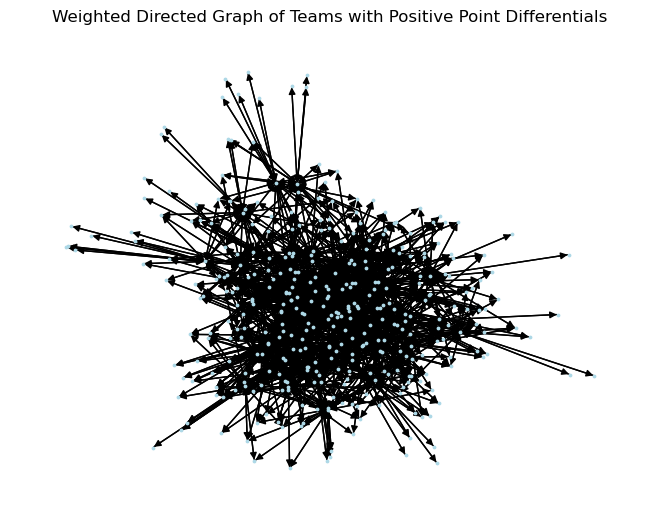

In [6]:
df = all_data.copy()

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the positive point differential
for index, row in df.iterrows():
    # if row['Diff'] > 0:
    G.add_edge(row['Team'], row['Opponent'], weight=row['Opp'], id=index)
    # else:
    G.add_edge(row['Opponent'], row['Team'], weight=row['Tm'], id=index)

print(G.edges(data=True))


# Draw the graph with edge labels (weights)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=3, node_color='lightblue', font_size=1, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=10)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weighted Directed Graph of Teams with Positive Point Differentials")
plt.show()


In [ ]:
import random
import numpy as np

def random_edge_subgraph(graph, drop_rate):
    sample_edges = random.sample(graph.edges(data=True), int(graph.number_of_edges() * (1 - drop_rate)))
    
    def filter_edges(u, v, data):
        for edge in sample_edges:
            if (edge[0] == u and edge[1] == v) or (edge[0] == v and edge[1] == u) and edge[2]['id'] == data['id']:
                return False
        return True

    subgraph = nx.subgraph_view(graph, filter_edge=filter_edges)
    return subgraph, subgraph.edges(data=True)

def ransac(graph, num_iters=1000, drop_rate=0.05):
    
    full_graph_pagerank = nx.pagerank(graph, weight='weight', max_iter=100, alpha=0.95)
    full_rank = np.array([full_graph_pagerank[node] for node in graph.nodes()])
    median = np.median(full_rank)
    median_ad = np.median(np.abs(full_rank - median))

    sample_ranks = []
    for i in range(num_iters):
        subgraph, subgraph_edges = random_edge_subgraph(graph, drop_rate)
        sample_pagerank = nx.pagerank(subgraph, weight='weight', max_iter=100, alpha=0.95)
        sample_rank = np.array([sample_pagerank[node] for node in subgraph.nodes()])
        sample_ranks.append(sample_rank)
        
        inliers = np.abs(sample_rank - median) < 2 * median_ad
        if np.sum(inliers) > 0.8 * len(inliers):
            return inliers, sample_rank, subgraph_edges, np.array(sample_ranks[:-1]), i

    raise Exception("No inliers found; try different values for num_iters and drop_rate")

inliers, sample_rank, subgraph_edges, sample_ranks, num_iters = ransac(G, num_iters=1000, drop_rate=0.05)

ModuleNotFoundError: No module named 'scipy'